# Analysis Covid Indonesia 

Menganalisis virus covid di indonesia khususnya di pulau Sumatra Utara. Yang dimana daerah sangat menjadi pusat perhatikan karna banyak yang terkena atau terpapar virus covid ini. Dalam hal ini saya akan melakukan analisis dengan menggunakan tipe analysis deskriptif. Dimana tipe analysis yang saya gunakan untuk menganalisis data dan memberikan wawasan apa yang terjadi.


----


-----

# 1. Memahami Data


Adapaun data yang digunakan adalah data Covid Indonesia yang saya ambil dari Kaggle sebagai bahan analysis saya.



Sebelum lebih jauh kita harus paham isi dari data yang dianalysis seperti memahami setiap kolom yang ada pada data yang analysis.

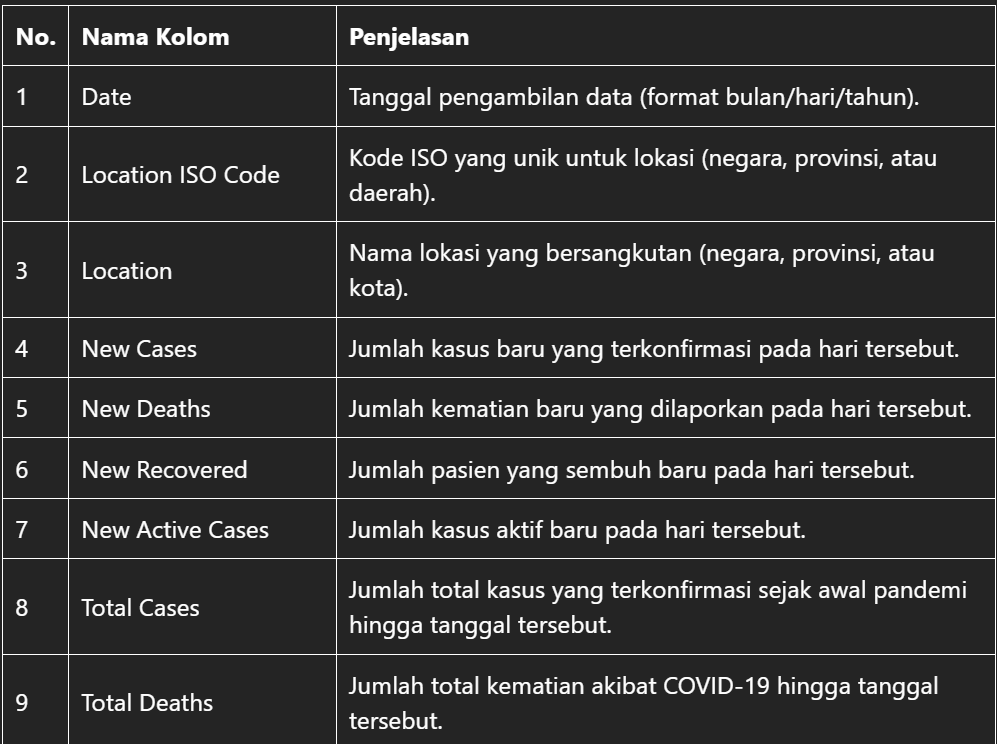


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [26]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head(10)


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.0,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
7,3/3/2020,ID-RI,Riau,0,0,0,0,1,0,1,...,0.511648,0.00,0.16,0.00,0.00,0.00,0.00%,100.00%,0.0,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,75,...,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,166.67%,1.0,1.0
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.0,1.0


In [27]:
# Syantak untuk mengambil beberapa kolom dari banyak kolom dalam dataset

all_data = data[['Date','Location','New Cases','New Deaths','Total Cases', 'Total Deaths']]

In [28]:
all_data

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
0,3/1/2020,DKI Jakarta,2,0,39,20
1,3/2/2020,DKI Jakarta,2,0,41,20
2,3/2/2020,Indonesia,2,0,2,0
3,3/2/2020,Riau,1,0,1,0
4,3/3/2020,DKI Jakarta,2,0,43,20
...,...,...,...,...,...,...
31817,9/15/2022,Sulawesi Utara,37,0,52770,1213
31818,9/15/2022,Sumatera Barat,13,0,104640,2371
31819,9/15/2022,Sumatera Selatan,16,0,82198,3376
31820,9/15/2022,Sumatera Utara,50,0,158866,3288


----


----

# 2. Cleanning Data

* Menhapus duplikasi

In [29]:
all_data.duplicated().any()

np.False_

* Missing Values

In [30]:
all_data.isnull().sum()

Date            0
Location        0
New Cases       0
New Deaths      0
Total Cases     0
Total Deaths    0
dtype: int64

* Mengubah Tipe Data


In [31]:
# cek type data

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          31822 non-null  object
 1   Location      31822 non-null  object
 2   New Cases     31822 non-null  int64 
 3   New Deaths    31822 non-null  int64 
 4   Total Cases   31822 non-null  int64 
 5   Total Deaths  31822 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [32]:
# Mengubah tipe data date to datetime

all_data['Date'] = pd.to_datetime(all_data['Date'])

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_6704\392821271.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
all_data['Date'].dtypes

dtype('<M8[ns]')

* Memperbaiki Kesalah Ketik

In [34]:
# Proses mencari tahu disetiap kolom yang dipilih apakah ada data yang unik

all_data.nunique()

Date              930
Location           35
New Cases        2591
New Deaths        405
Total Cases     22951
Total Deaths     6419
dtype: int64

In [35]:
# Menampikan apa saja hal unik disetiap kolomnya

for i in all_data.select_dtypes(include=['object']) :
    print(f'Kolom = {i}')
    print(all_data[i].unique())
    print

Kolom = Location
['DKI Jakarta' 'Indonesia' 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daerah Istimewa Yogyakarta' 'Sumatera Utara' 'Jawa Timur'
 'Kepulauan Riau' 'Sulawesi Selatan' 'Jambi' 'Maluku' 'Papua'
 'Maluku Utara' 'Sumatera Selatan' 'Aceh' 'Kalimantan Tengah' 'Lampung'
 'Sulawesi Tengah' 'Sulawesi Utara' 'Sumatera Barat' 'Papua Barat'
 'Kalimantan Utara' 'Sulawesi Barat' 'Kalimantan Barat'
 'Kalimantan Selatan' 'Kepulauan Bangka Belitung' 'Bengkulu'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Gorontalo']


In [36]:
all_data['Location']

0             DKI Jakarta
1             DKI Jakarta
2               Indonesia
3                    Riau
4             DKI Jakarta
               ...       
31817      Sulawesi Utara
31818      Sumatera Barat
31819    Sumatera Selatan
31820      Sumatera Utara
31821           Indonesia
Name: Location, Length: 31822, dtype: object

In [37]:
# Menghapus 'Indonesia' paada kolom Location

all_data['Location'] = all_data['Location'].str.replace('Indonesia', '',regex=False).str.strip()

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_6704\575373323.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
# Menghapus baris yang memiliki nilai kosong di kolom 'Location'

all_data = all_data[all_data['Location'] != '']
all_data

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
0,2020-03-01,DKI Jakarta,2,0,39,20
1,2020-03-02,DKI Jakarta,2,0,41,20
3,2020-03-02,Riau,1,0,1,0
4,2020-03-03,DKI Jakarta,2,0,43,20
6,2020-03-03,Jawa Barat,1,1,1,1
...,...,...,...,...,...,...
31816,2022-09-15,Sulawesi Tenggara,2,0,25693,569
31817,2022-09-15,Sulawesi Utara,37,0,52770,1213
31818,2022-09-15,Sumatera Barat,13,0,104640,2371
31819,2022-09-15,Sumatera Selatan,16,0,82198,3376


In [39]:
all_data['Location']


# Hasillnya indonesia telah dihapus dari all_data

0              DKI Jakarta
1              DKI Jakarta
3                     Riau
4              DKI Jakarta
6               Jawa Barat
               ...        
31816    Sulawesi Tenggara
31817       Sulawesi Utara
31818       Sumatera Barat
31819     Sumatera Selatan
31820       Sumatera Utara
Name: Location, Length: 30893, dtype: object

----

----

# 3. Visualisasi Data

 1. Lakukan visualisasi pada kolom location

In [40]:
all_data

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
0,2020-03-01,DKI Jakarta,2,0,39,20
1,2020-03-02,DKI Jakarta,2,0,41,20
3,2020-03-02,Riau,1,0,1,0
4,2020-03-03,DKI Jakarta,2,0,43,20
6,2020-03-03,Jawa Barat,1,1,1,1
...,...,...,...,...,...,...
31816,2022-09-15,Sulawesi Tenggara,2,0,25693,569
31817,2022-09-15,Sulawesi Utara,37,0,52770,1213
31818,2022-09-15,Sumatera Barat,13,0,104640,2371
31819,2022-09-15,Sumatera Selatan,16,0,82198,3376


In [41]:
all_data.describe()

,Date,New Cases,New Deaths,Total Cases,Total Deaths
count,30893,30893.000000,30893.000000,3.089300e+04,30893.000000
mean,2021-06-18 01:54:03.647428352,207.079565,5.108568,8.204233e+04,2354.077202
min,2020-03-01 00:00:00,0.000000,0.000000,1.000000e+00,0.000000
25%,2020-11-03 00:00:00,3.000000,0.000000,4.905000e+03,121.000000
50%,2021-06-18 00:00:00,24.000000,0.000000,2.268400e+04,539.000000
75%,2022-01-31 00:00:00,113.000000,3.000000,6.467900e+04,1885.000000
max,2022-09-15 00:00:00,16251.000000,545.000000,1.412511e+06,33489.000000
std,NaN,771.874452,22.344819,1.852533e+05,5471.624776


 1. Lakukan visualisasi pada kolom location

In [42]:
visual_location = all_data.groupby('Location')['New Cases'].sum().reset_index()

In [43]:
top_3_location = visual_location.nlargest(3,'New Cases')
top_3_location

,Location,New Cases
4,DKI Jakarta,1412474
8,Jawa Barat,1173731
9,Jawa Tengah,636409


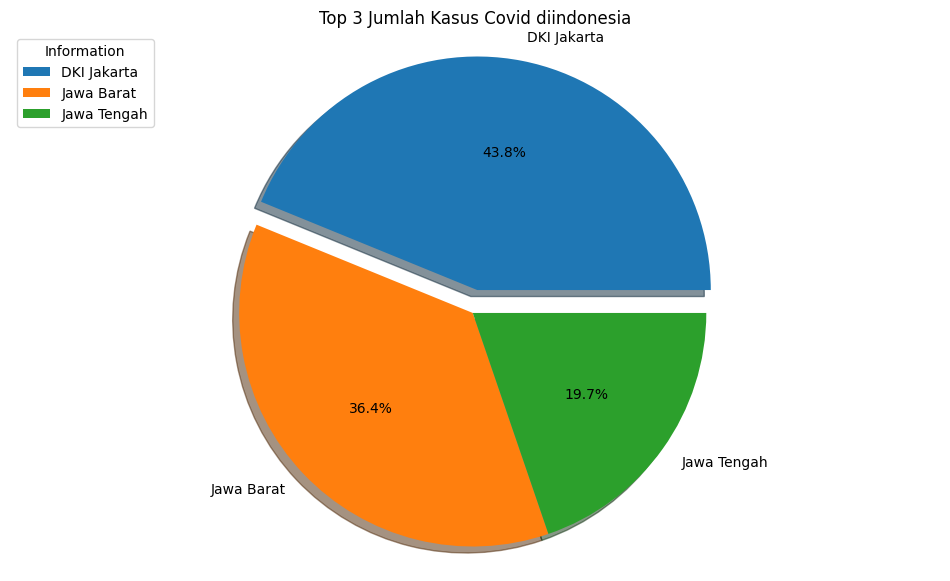

In [44]:
nn = [0.1,0,0]


plt.figure(figsize=(12,7))
plt.pie(top_3_location['New Cases'], labels=top_3_location['Location'], explode=nn, shadow= True, autopct="%1.1f%%")
plt.title('Top 3 Jumlah Kasus Covid diindonesia')
plt.legend(title = 'Information', loc = 'upper left')

plt.axis('equal')
plt.show()

2. Lakukan visualisasi - Jumlah kematian yang disumatera Utara


<Figure size 1000x600 with 0 Axes>

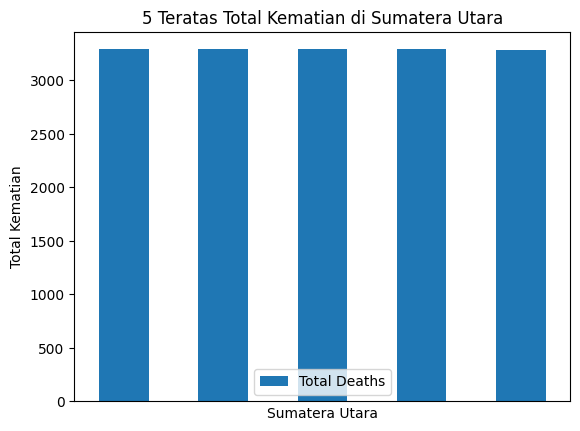

In [45]:
# Filter data untuk Sumatera Utara
sumut = all_data[all_data['Location'] == 'Sumatera Utara']

# Ambil 5 data teratas berdasarkan Total Deaths
top_5 = sumut.nlargest(5, 'Total Deaths')

# Buat plot bar
plt.figure(figsize=(10, 6))
top_5.plot(x='Date', y='Total Deaths', kind='bar')

# Tambahkan judul dan label sumbu
plt.title('5 Teratas Total Kematian di Sumatera Utara')
plt.xlabel('Sumatera Utara')
plt.ylabel('Total Kematian')

# Sembunyikan nilai sumbu x
plt.xticks([])

plt.show()

In [46]:
sumut = all_data['Location'].isin(['Sumatera Utara'])

In [47]:
total_kasus = all_data[sumut].groupby('Date')['Total Cases'].sum().reset_index()

In [48]:
px.line(x = total_kasus['Date'], y = total_kasus['Total Cases'], labels={'x' : 'Date', 'y' : 'Total Kasus'}, title= 'Pertumbuhan Virus Covid di Sumatera Utara - Total Kasus')
